In [2]:

!pip install pyvital vitaldb vital
!pip install neurokit2
import vitaldb
import pandas as pd
import numpy as np

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # Load clinical data
df_trks = pd.read_csv('https://api.vitaldb.net/trks')  # Load track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # Load lab result

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.2

In [3]:
# inclusion / exclusion criteria
caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'SNUADC/ECG_II', 'caseid'])&
    set(df_trks.loc[df_trks['tname'] == 'SNUADC/ART', 'caseid'])
)

print('Total {} cases found'.format(len(caseids)))

Total 3644 cases found


In [4]:
caseids

[1,
 3,
 4,
 7,
 10,
 12,
 13,
 14,
 16,
 17,
 19,
 20,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 34,
 38,
 43,
 44,
 46,
 49,
 50,
 51,
 52,
 53,
 55,
 58,
 59,
 60,
 61,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 74,
 75,
 77,
 79,
 83,
 84,
 87,
 89,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 101,
 103,
 104,
 105,
 108,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 124,
 125,
 126,
 128,
 130,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 145,
 146,
 148,
 149,
 150,
 152,
 153,
 156,
 157,
 160,
 161,
 163,
 164,
 166,
 167,
 168,
 172,
 175,
 177,
 178,
 180,
 181,
 183,
 184,
 185,
 186,
 189,
 190,
 191,
 195,
 197,
 198,
 199,
 200,
 202,
 203,
 206,
 207,
 208,
 210,
 217,
 218,
 221,
 222,
 229,
 230,
 232,
 233,
 234,
 236,
 237,
 239,
 241,
 242,
 243,
 244,
 246,
 247,
 250,
 251,
 252,
 256,
 258,
 261,
 263,
 264,
 266,
 268,
 269,
 270,
 272,
 279,
 280,
 281,
 282,
 283,
 286,
 287,
 293,
 295,
 296,
 297,
 300,
 302,
 303,
 304,
 306,
 308,
 309,
 312,
 316,


In [5]:
import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()



srate = 100
vals = vitaldb.load_case(caseids[0], ['SNUADC/ECG_II','SNUADC/ART'], 1 / srate)

main_signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]



ecg_sliced = main_signal[110000:111000]#vals[110000:111000, 0]

In [22]:
main_signal = main_signal[(main_signal>= -.25) & (main_signal<=.25)]

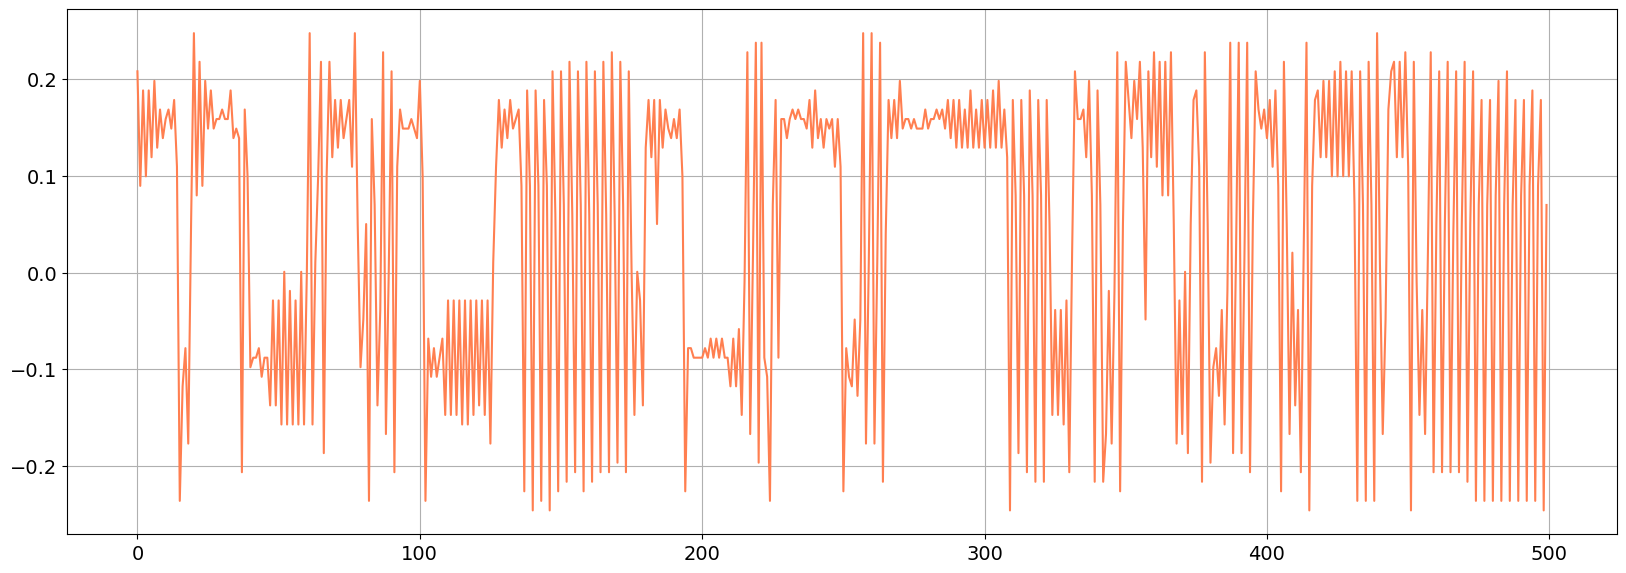

In [54]:
nrml_plt(main_signal[1040000:1040500])

#Neurokit

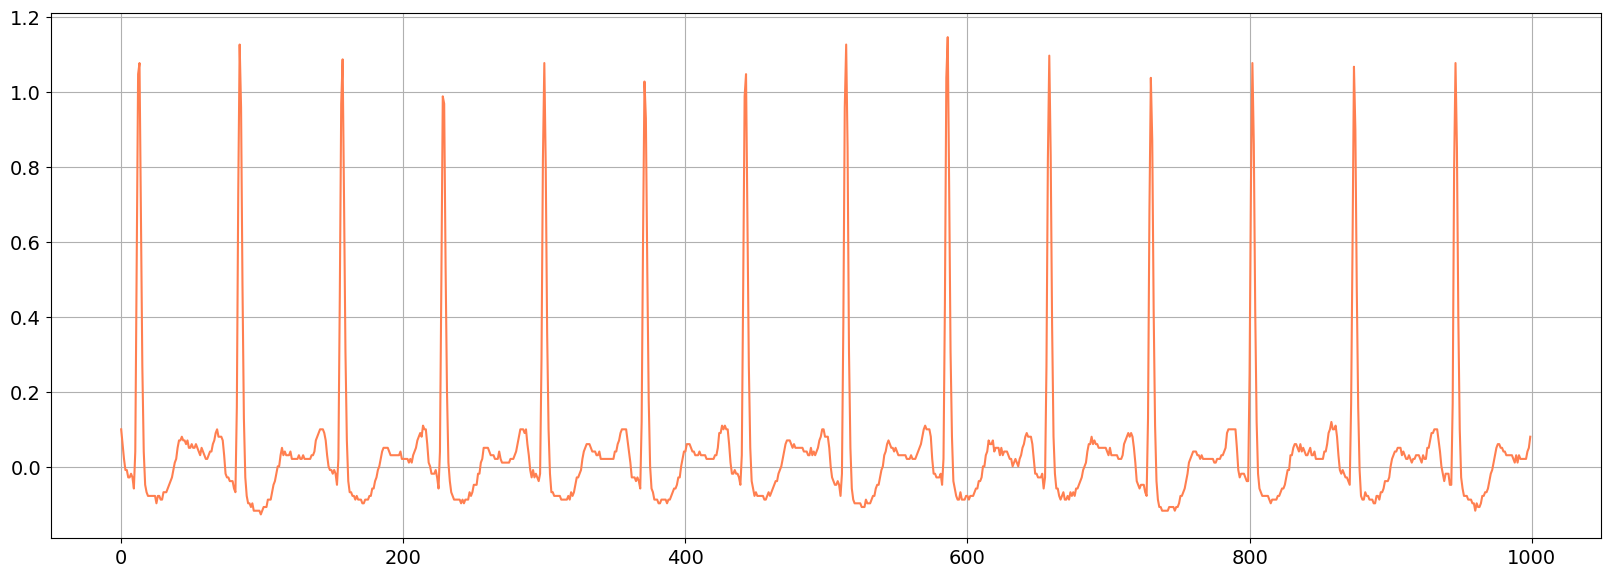

After Cleaning


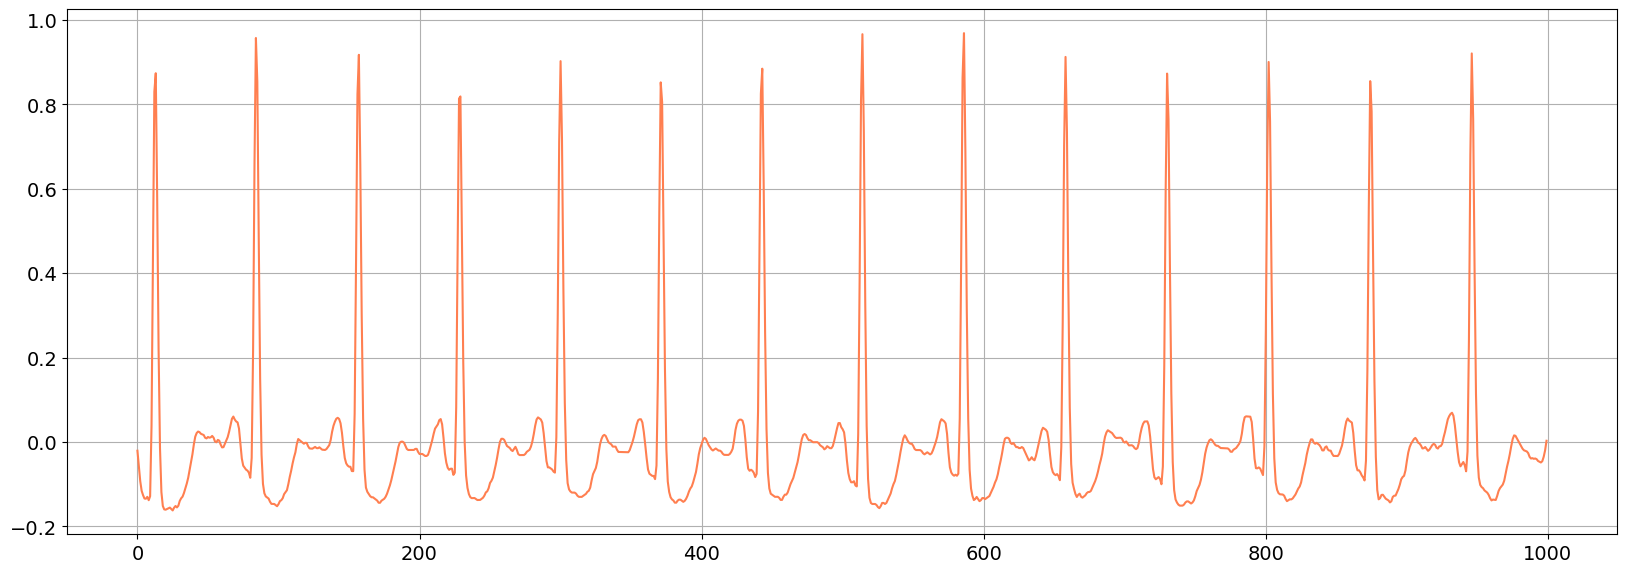

In [6]:
nrml_plt(ecg_sliced)
print("After Cleaning")
neurokit_filtered_ecg = nk.ecg_clean(ecg_sliced, sampling_rate=srate)
nrml_plt(neurokit_filtered_ecg)


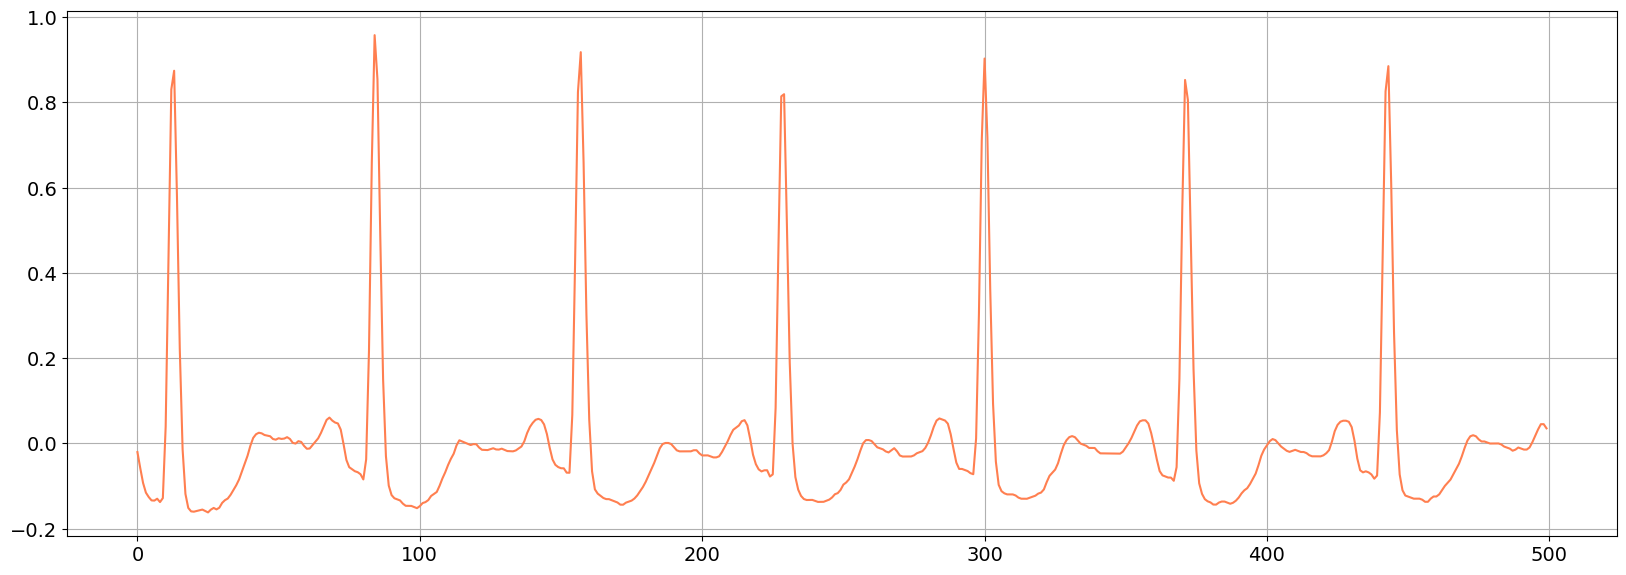

In [7]:
nrml_plt(neurokit_filtered_ecg[0:500])

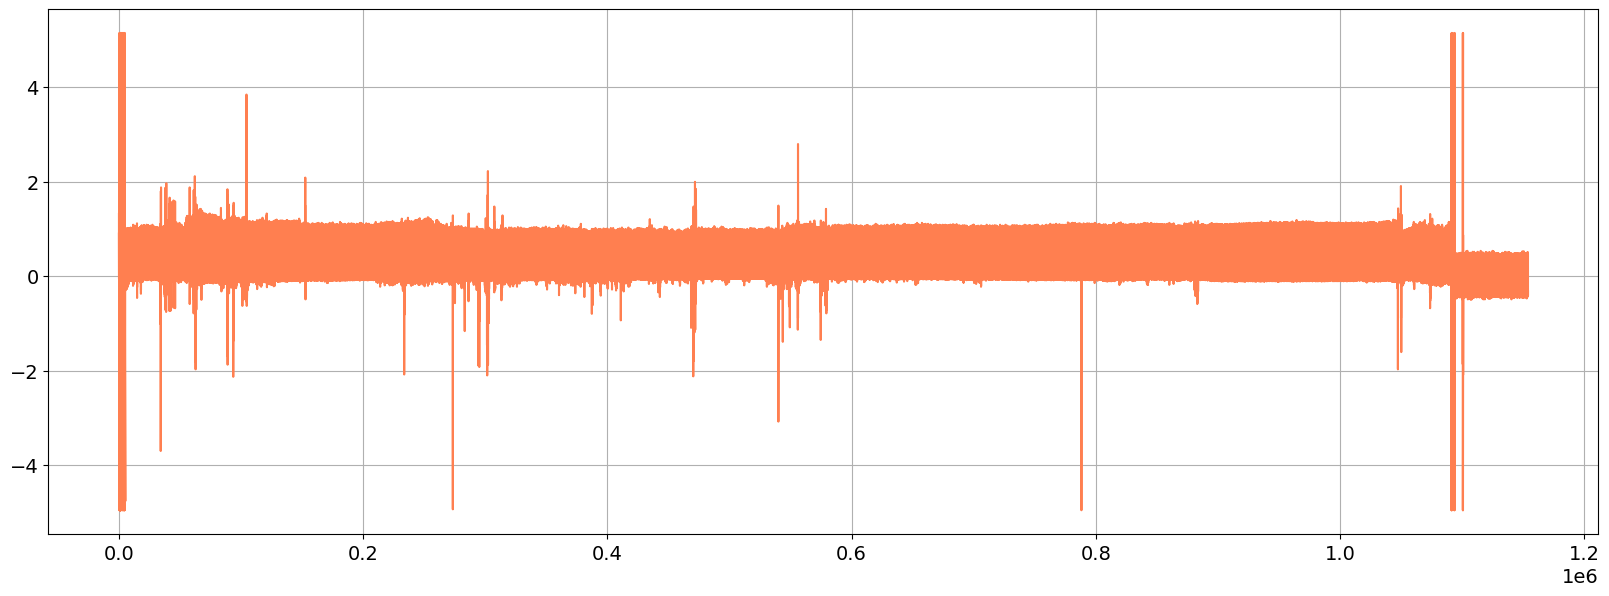

In [8]:
nrml_plt(main_signal)

#heartpy

[link](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/heartpy.filtering.html)

In [9]:
!pip install heartpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.6 MB/s eta 0:00:00


In [10]:
import heartpy as hp

cut out all frequencies below 40Hz with a highpass filter:

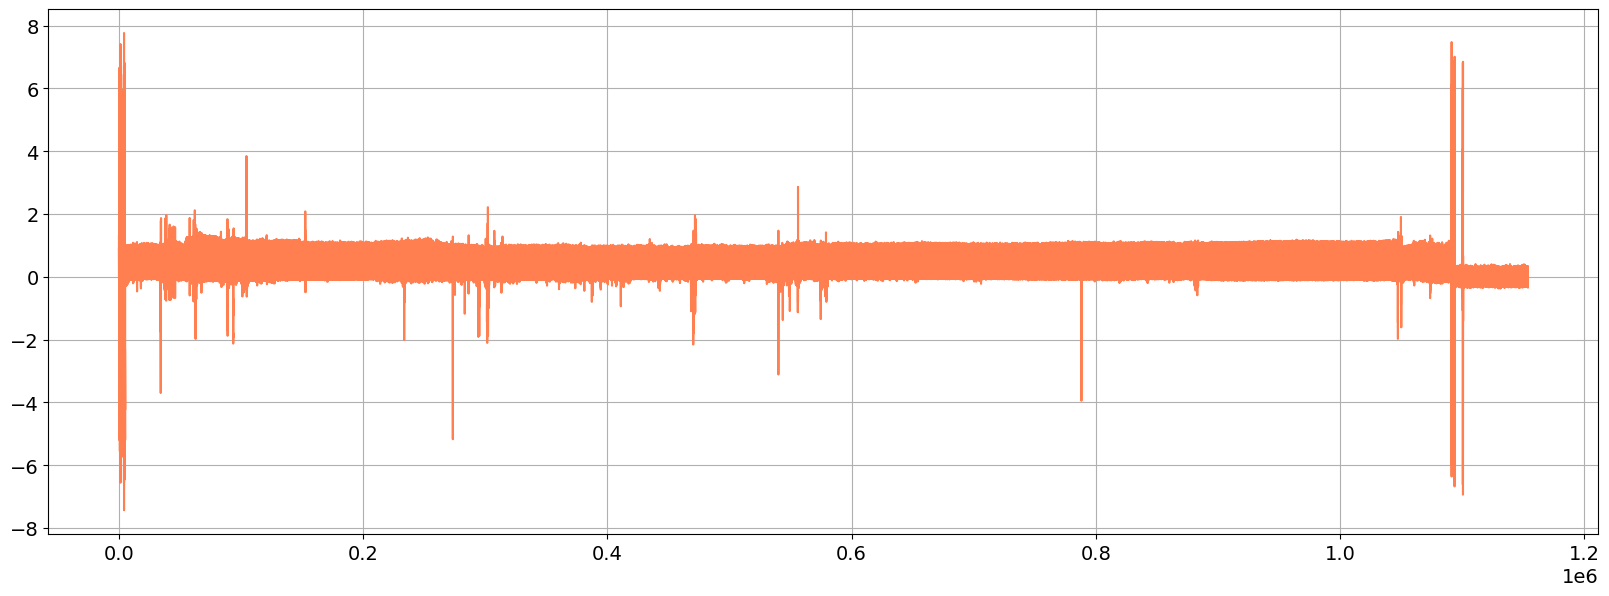

In [11]:
filtered = hp.filter_signal(main_signal, cutoff = 40, sample_rate = 100.0, order = 3, filtertype='lowpass')
nrml_plt(filtered)

specify a range (here: 0.75 - 3.5Hz), outside of which all frequencies are cut out.

In [ ]:
filtering

set-1
-.25<=y<=.25

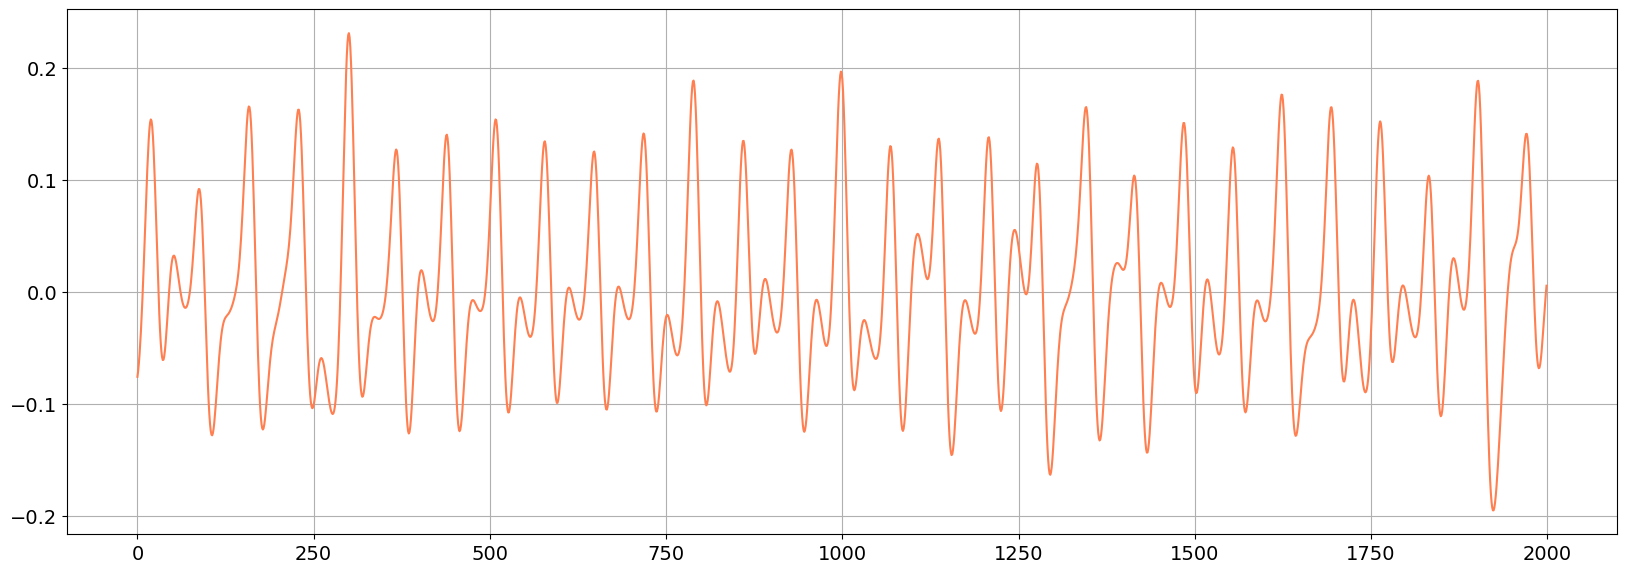

In [20]:
filtered = hp.filter_signal(main_signal, cutoff = [0.75, 3.5], sample_rate = 100.0, order = 3, filtertype='bandpass')
nrml_plt(filtered[6000:8000])

 return_top flag to only return the filter response that has amplitute above zero.

In [ ]:
filtered = hp.filter_signal(main_signal, cutoff = [0.75, 3.5], sample_rate = 100.0,order = 3, filtertype='bandpass', return_top = True)
nrml_plt(filtered)

In [ ]:
filtered = hp.filtering.hampel_correcter(main_signal, 100)
nrml_plt(filtered)

smooths given signal using savitzky-golay filter

In [ ]:
filtered = hp.filtering.smooth_signal(main_signal, 100, window_length=None, polyorder=3)
nrml_plt(filtered)

#biosppy

In [ ]:
!pip install biosppy

In [ ]:
from biosppy import storage
from biosppy.signals import ecg



# process it and plot
out = ecg.ecg(signal=main_signal, sampling_rate=100., show=False)
bio_filtered = out[1]

In [ ]:
nrml_plt(out[1])